# LIBRAIES

In [76]:
import os
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
from scipy.fftpack import fft,ifft
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from keras import optimizers
import math
from datetime import timedelta
import datetime
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
le = preprocessing.LabelEncoder()

In [77]:
print(os.listdir('./train/'))

['.ipynb_checkpoints', 'AXIL_201910_MAX_TORQUE.csv', 'dummydata.csv', 'F5EVHCP10YR_201910_MAX_TORQUE.csv']


# 1.START from HERE ------- >READ FILE

In [78]:
train = pd.read_csv('./train/F5EVHCP10YR_201910_MAX_TORQUE.csv')

In [79]:
#train = train[:-1]

In [80]:
train.tail(5)

,STARTTIME,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
370796,2019-10-24 16:27:50.000,AXI_3_U,CT80_90,2019102416,2750000,13.065,20191024162750
370797,2019-10-24 16:27:58.000,AXI_3_U,CT20_30,2019102416,2758000,9.646,20191024162758
370798,2019-10-24 16:28:06.000,AXI_3_U,CT20_30,2019102416,2806000,12.088,20191024162806
370799,2019-10-24 16:28:08.000,AXI_3_U,CT70_80,2019102416,2808000,13.065,20191024162808
370800,2019-10-24 16:27:13.000,AXI_4_R,0,2019102416,2713000,0.238,20191024162713


# STARTTIME Data Process

In [81]:
train['STARTTIME']=pd.to_datetime(train['STARTTIME'])

In [82]:
train.head(5)

,STARTTIME,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
0,2019-10-02 20:47:02,AXI_3_U,CT80_90,2019100220,4702000,13.187,20191002204702
1,2019-10-02 20:47:03,AXI_3_U,CT20_30,2019100220,4703000,9.402,20191002204703
2,2019-10-02 20:47:04,AXI_3_U,CT90_100,2019100220,4704000,13.797,20191002204704
3,2019-10-02 20:47:05,AXI_3_U,CT70_80,2019100220,4705000,15.385,20191002204705
4,2019-10-02 20:48:12,AXI_3_U,CT30_40,2019100220,4812000,9.890,20191002204812


In [83]:
train.sort_values(by='STARTTIME',inplace=True) #先依時間進行排序

In [84]:
train.head()

,STARTTIME,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
9989,2019-10-02 13:26:08,AXI_2_L,0,2019100213,2608000,119.335,20191002132608
9895,2019-10-02 13:26:08,AXI_3_U,CT90_100,2019100213,2608000,16.606,20191002132608
9892,2019-10-02 13:26:08,AXI_1_S,0,2019100213,2608000,233.156,20191002132608
9837,2019-10-02 13:26:08,AXI_4_R,0,2019100213,2608000,114.853,20191002132608
11195,2019-10-02 13:26:09,AXI_3_U,CT130_140,2019100213,2609000,500.000,20191002132609


# 2.輸出排序後的資料 [dummydata.csv]

In [85]:
train.to_csv('./train/dummydata.csv',index=False)

# 3.Read New Detail Data

In [86]:
train = pd.read_csv('./train/dummydata.csv')

## 3.1 View Data  

In [87]:
train.head(5)

,STARTTIME,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
0,2019-10-02 13:26:08,AXI_2_L,0,2019100213,2608000,119.335,20191002132608
1,2019-10-02 13:26:08,AXI_3_U,CT90_100,2019100213,2608000,16.606,20191002132608
2,2019-10-02 13:26:08,AXI_1_S,0,2019100213,2608000,233.156,20191002132608
3,2019-10-02 13:26:08,AXI_4_R,0,2019100213,2608000,114.853,20191002132608
4,2019-10-02 13:26:09,AXI_3_U,CT130_140,2019100213,2609000,500.000,20191002132609


In [88]:
train.info()
print('-'*100)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370801 entries, 0 to 370800
Data columns (total 7 columns):
STARTTIME     370801 non-null object
CHAMBER       370801 non-null object
RECIPE        370801 non-null object
LOTNAME       370801 non-null int64
SLOTNO        370801 non-null int64
MAX_TORQUE    370801 non-null float64
SHEETID       370801 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 19.8+ MB
----------------------------------------------------------------------------------------------------


,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
count,3.708010e+05,3.708010e+05,370801.000000,3.708010e+05
mean,2.019101e+09,2.975112e+06,121.351745,2.019101e+13
std,6.345855e+02,1.738172e+06,152.441510,6.345884e+06
min,2.019100e+09,0.000000e+00,0.000000,2.019100e+13
25%,2.019101e+09,1.456000e+06,13.187000,2.019101e+13
50%,2.019101e+09,2.936000e+06,17.827000,2.019101e+13
75%,2.019102e+09,4.505000e+06,192.918000,2.019102e+13
max,2.019102e+09,5.959000e+06,500.000000,2.019102e+13


# 3.1.1 STARTTIME->obejct type transfer to Datetime

In [89]:
train['STARTTIME']=pd.to_datetime(train['STARTTIME'])
train.head()

,STARTTIME,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
0,2019-10-02 13:26:08,AXI_2_L,0,2019100213,2608000,119.335,20191002132608
1,2019-10-02 13:26:08,AXI_3_U,CT90_100,2019100213,2608000,16.606,20191002132608
2,2019-10-02 13:26:08,AXI_1_S,0,2019100213,2608000,233.156,20191002132608
3,2019-10-02 13:26:08,AXI_4_R,0,2019100213,2608000,114.853,20191002132608
4,2019-10-02 13:26:09,AXI_3_U,CT130_140,2019100213,2609000,500.000,20191002132609


In [90]:
train.set_index('STARTTIME')

,CHAMBER,RECIPE,LOTNAME,SLOTNO,MAX_TORQUE,SHEETID
STARTTIME,,,,,,
2019-10-02 13:26:08,AXI_2_L,0,2019100213,2608000,119.335,20191002132608
2019-10-02 13:26:08,AXI_3_U,CT90_100,2019100213,2608000,16.606,20191002132608
2019-10-02 13:26:08,AXI_1_S,0,2019100213,2608000,233.156,20191002132608
2019-10-02 13:26:08,AXI_4_R,0,2019100213,2608000,114.853,20191002132608
2019-10-02 13:26:09,AXI_3_U,CT130_140,2019100213,2609000,500.000,20191002132609
...,...,...,...,...,...,...
2019-10-24 16:28:07,AXI_3_U,CT140_150,2019102416,2807000,12.088,20191024162807
2019-10-24 16:28:08,AXI_3_U,CT70_80,2019102416,2808000,13.065,20191024162808
2019-10-24 16:28:09,AXI_3_U,CT50_60,2019102416,2809000,13.919,20191024162809


# 3.1.2 Remove unuse Data

In [91]:
drop_list=['LOTNAME','SHEETID','SLOTNO']

In [92]:
train=train.drop('LOTNAME',axis=1)
train=train.drop('SLOTNO',axis=1)
train=train.drop('SHEETID',axis=1)

In [93]:
train.head()

,STARTTIME,CHAMBER,RECIPE,MAX_TORQUE
0,2019-10-02 13:26:08,AXI_2_L,0,119.335
1,2019-10-02 13:26:08,AXI_3_U,CT90_100,16.606
2,2019-10-02 13:26:08,AXI_1_S,0,233.156
3,2019-10-02 13:26:08,AXI_4_R,0,114.853
4,2019-10-02 13:26:09,AXI_3_U,CT130_140,500.000


# 4.資料提取

In [94]:
recipe = train['RECIPE'].unique().tolist()
print(recipe)
print(len(recipe))

['0', 'CT90_100', 'CT130_140', 'CT800_810', 'CT110_120', 'CT70_80', 'CT60_70', 'CT20_30', 'CT30_40', 'CT40_50', 'CT120_130', 'CT50_60', 'CT100_110', 'CT220_230', 'CT430_440', 'CT300_310', 'CT140_150', 'CT250_260', 'CT480_490', 'CT320_330', 'CT710_720', 'CT80_90', 'CT160_170', 'CT360_370', 'CT830_840', 'CT380_390', 'CT610_620', 'CT310_320', 'CT790_800', 'CT150_160', 'CT280_290', 'CT1000_1010', 'CT370_380', 'CT390_400', 'CT210_220', 'CT470_480', 'CT340_350', 'CT660_670', 'CT240_250', 'CT540_550', 'CT400_410', 'CT190_200', 'CT580_590', 'CT330_340', 'CT640_650', 'CT260_270', 'CT200_210', 'CT290_300', 'CT550_560', 'CT270_280', 'CT350_360', 'CT440_450', 'CT180_190', 'CT920_930', 'CT840_850', 'CT170_180', 'CT500_510', 'CT850_860', 'CT760_770', 'CT230_240', 'CT730_740', 'CT520_530', 'CT770_780', 'CT900_910', 'CT630_640', 'CT680_690', 'CT590_600', 'CT960_970', 'CT450_460', 'CT620_630', 'CT780_790', 'CT510_520', 'CT970_980', 'CT420_430', 'CT880_890', 'CT410_420', 'CT860_870', 'CT490_500', 'CT870

In [95]:
chamber = train['CHAMBER'].unique().tolist()
print(chamber)

['AXI_2_L', 'AXI_3_U', 'AXI_1_S', 'AXI_4_R']


In [185]:
train_CT_90_100 = train[train['RECIPE'] =='CT80_90']

In [186]:
train_CT_90_100.tail()

,STARTTIME,CHAMBER,RECIPE,MAX_TORQUE
370640,2019-10-24 16:13:44,AXI_3_U,CT80_90,11.477
370667,2019-10-24 16:15:16,AXI_3_U,CT80_90,10.256
370675,2019-10-24 16:15:25,AXI_3_U,CT80_90,12.576
370766,2019-10-24 16:27:30,AXI_3_U,CT80_90,16.606
370783,2019-10-24 16:27:50,AXI_3_U,CT80_90,13.065


In [187]:
y_90_100 = train_CT_90_100['MAX_TORQUE']
x_time = train_CT_90_100['STARTTIME']

In [188]:
train_CT_90_100['CHAMBER'].unique()

array(['AXI_3_U', 'AXI_4_R', 'AXI_1_S', 'AXI_2_L'], dtype=object)

In [191]:
train_= train_CT_90_100[train_CT_90_100['CHAMBER']=='AXI_4_R']
y_ = train_['MAX_TORQUE']
x_ = train_['STARTTIME']
train_.head(2)

,STARTTIME,CHAMBER,RECIPE,MAX_TORQUE
877,2019-10-02 14:18:08,AXI_4_R,CT80_90,163.614
2119,2019-10-02 16:00:08,AXI_4_R,CT80_90,211.600


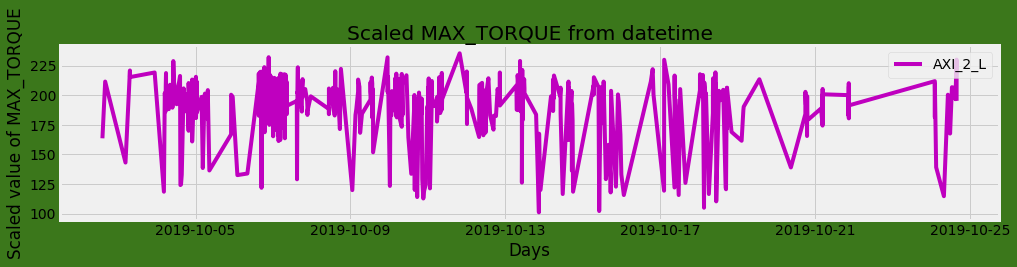

In [192]:
# 畫圖
plt.figure(figsize=(15,3), facecolor='#3B771B', edgecolor='green')
plt.title('Scaled MAX_TORQUE from datetime')
plt.xlabel('Days')
plt.ylabel('Scaled value of MAX_TORQUE')
#plt.plot(x_time[:-1].values ,y_90_100[:-1], label='MAX_TORQUE data',color='r')
plt.plot(x_[:-1].values ,y_[:-1], label='AXI_2_L',color='m')
plt.legend()
plt.show()

# 5. Draw Data

In [209]:
def drawData():
    #fig,axes=plt.subplots(1,4)
    colors = "bgrcmyk"
    color_index = 0    
    for i in range(len(recipe)-1):
    #for i in range(5): # for debug
        output = train[train['RECIPE'] ==recipe[i]]
        print(output.head(3))
        #recipe = train['RECIPE'].unique().tolist()
        chamber_list = output['CHAMBER'].unique().tolist()
        #print(chamber_list)
        color_index = 0
        for j in range(len(chamber_list)-1):
            plt.figure(figsize=(10,2), facecolor='#4DBEEE', edgecolor='green')
            plt.title(recipe[i])
            plt.xlabel('Days')
            plt.ylabel('Scaled value of MAX_TORQUE')
            output_ = output[output['CHAMBER']== chamber_list[j]]
            x = output_['STARTTIME']
            y = output_['MAX_TORQUE']
            #plt.ylim(0,500)
            plt.plot(x[:-1].values ,y[:-1], label=chamber_list[j],color =colors[color_index])
            plt.legend(loc = 'best')
            color_index = color_index + 1 
        plt.show()

            STARTTIME  CHAMBER RECIPE  MAX_TORQUE
0 2019-10-02 13:26:08  AXI_2_L      0     119.335
2 2019-10-02 13:26:08  AXI_1_S      0     233.156
3 2019-10-02 13:26:08  AXI_4_R      0     114.853


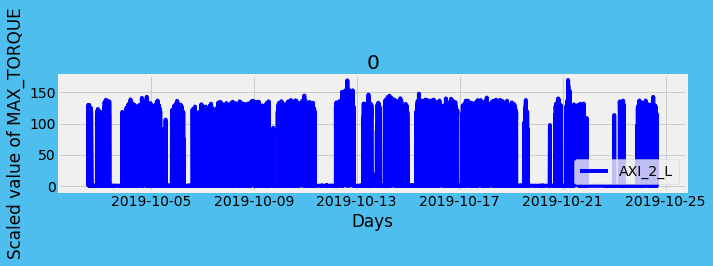

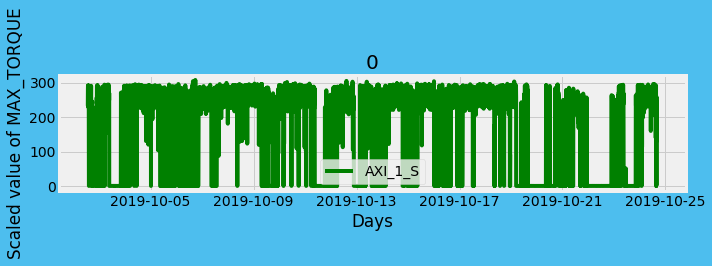

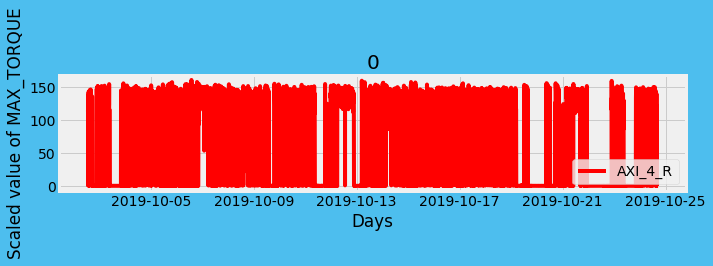

             STARTTIME  CHAMBER    RECIPE  MAX_TORQUE
1  2019-10-02 13:26:08  AXI_3_U  CT90_100      16.606
5  2019-10-02 13:26:10  AXI_2_L  CT90_100     202.442
11 2019-10-02 13:26:16  AXI_2_L  CT90_100     198.657


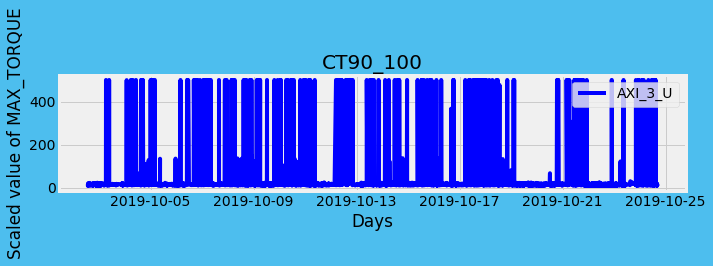

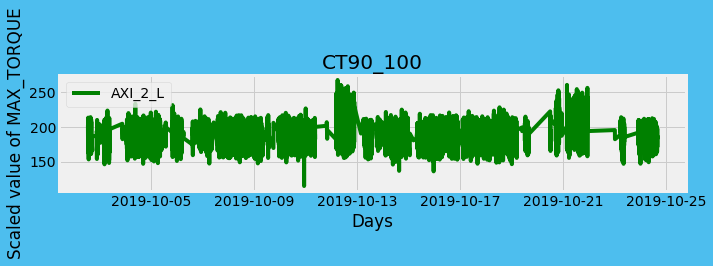

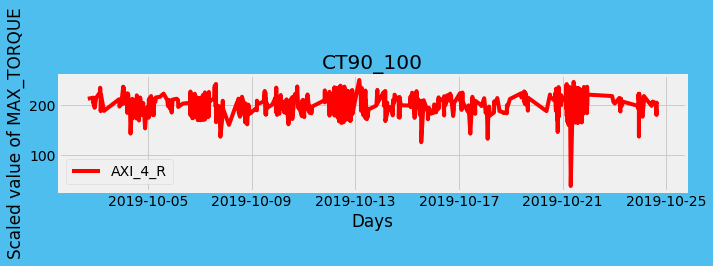

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
4   2019-10-02 13:26:09  AXI_3_U  CT130_140     500.000
276 2019-10-02 13:40:49  AXI_3_U  CT130_140      14.164
321 2019-10-02 13:42:43  AXI_1_S  CT130_140     444.078


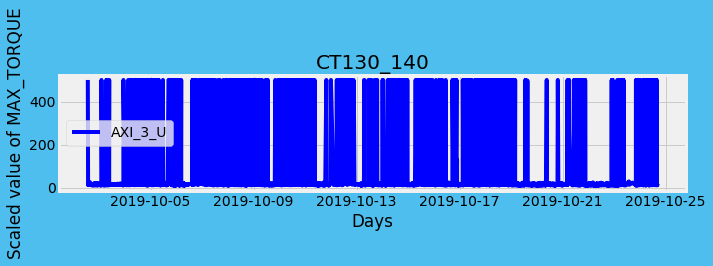

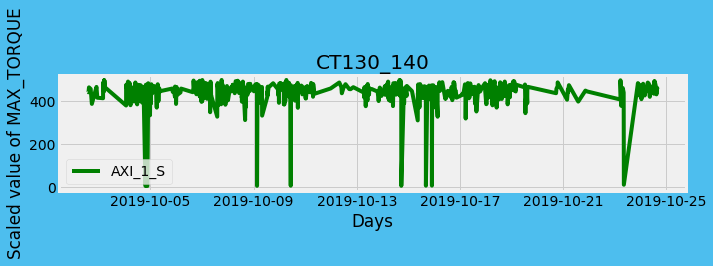

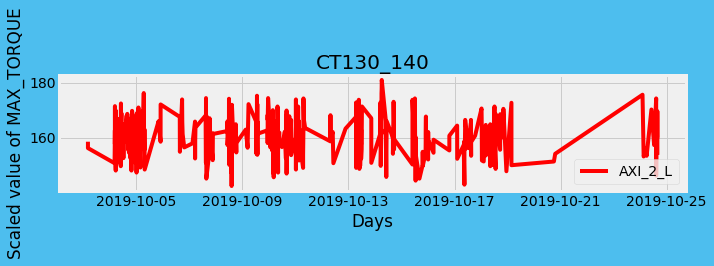

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
6    2019-10-02 13:26:10  AXI_3_U  CT800_810       500.0
892  2019-10-02 14:18:32  AXI_3_U  CT800_810       500.0
6113 2019-10-02 21:48:33  AXI_3_U  CT800_810       500.0
            STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
7 2019-10-02 13:26:12  AXI_4_R  CT110_120     189.011
8 2019-10-02 13:26:12  AXI_2_L  CT110_120     164.713
9 2019-10-02 13:26:14  AXI_4_R  CT110_120     172.161


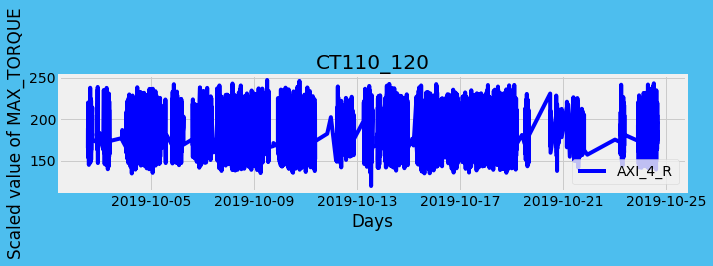

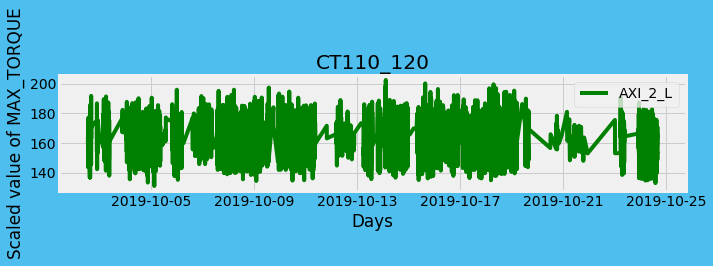

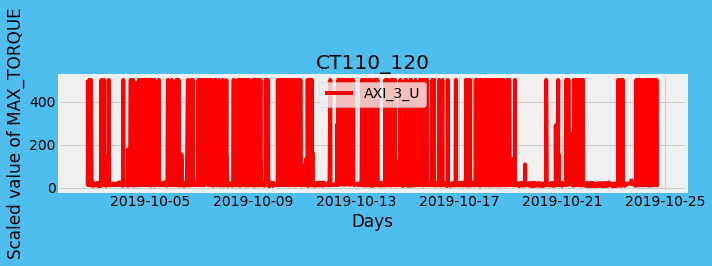

             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
10 2019-10-02 13:26:16  AXI_1_S  CT70_80     451.038
31 2019-10-02 13:26:42  AXI_3_U  CT70_80      13.309
32 2019-10-02 13:26:43  AXI_3_U  CT70_80      13.187


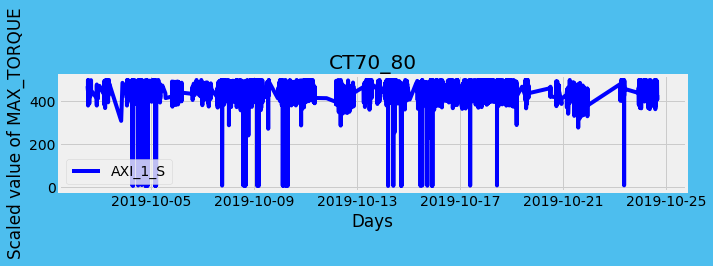

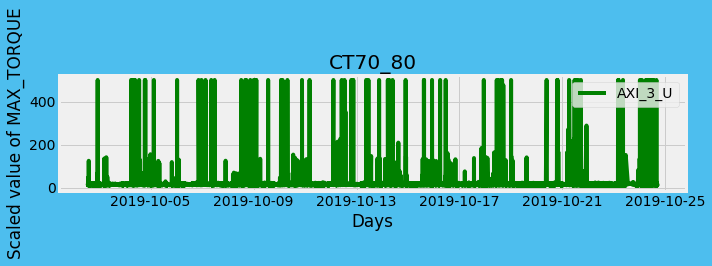

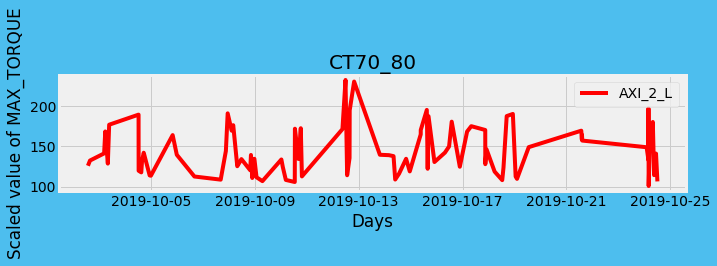

              STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
12  2019-10-02 13:26:19  AXI_3_U  CT60_70      17.827
133 2019-10-02 13:32:51  AXI_3_U  CT60_70      15.263
140 2019-10-02 13:33:04  AXI_3_U  CT60_70      16.117


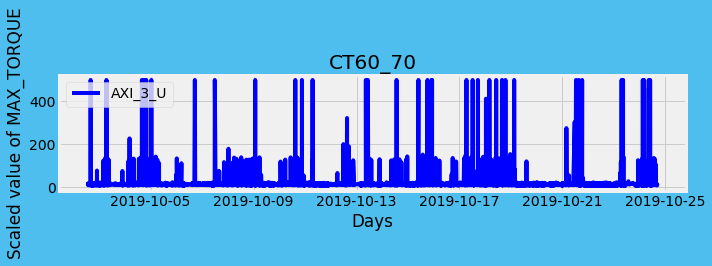

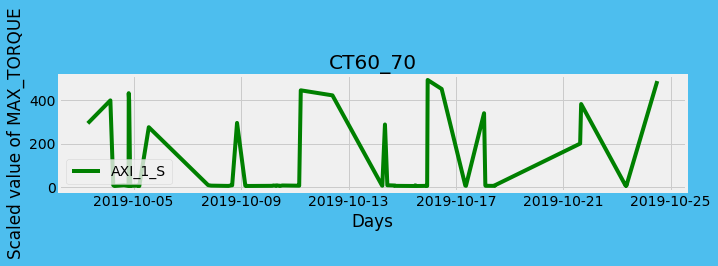

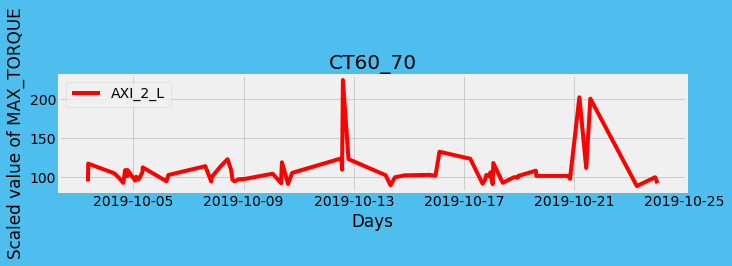

             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
13 2019-10-02 13:26:20  AXI_3_U  CT20_30      11.600
30 2019-10-02 13:26:41  AXI_3_U  CT20_30      13.309
36 2019-10-02 13:26:48  AXI_3_U  CT20_30       9.158


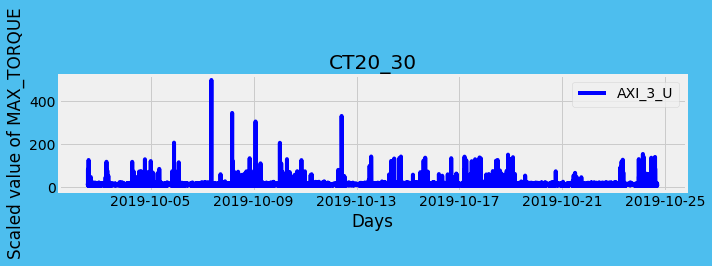

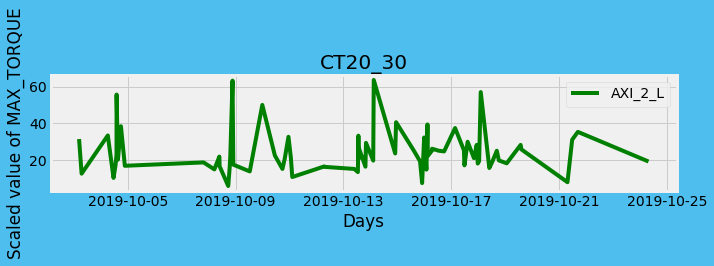

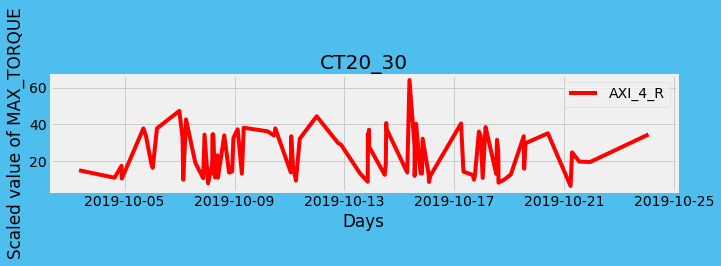

             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
14 2019-10-02 13:26:21  AXI_3_U  CT30_40      13.309
61 2019-10-02 13:30:20  AXI_3_U  CT30_40      10.379
90 2019-10-02 13:31:01  AXI_3_U  CT30_40      14.652


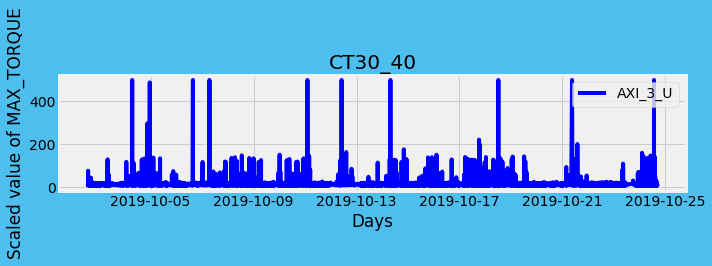

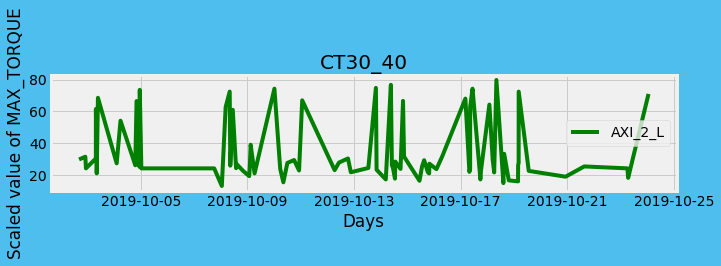

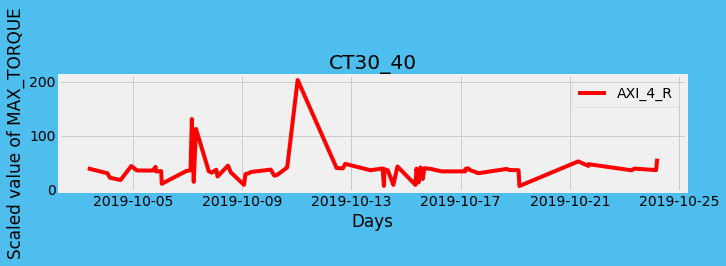

             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
15 2019-10-02 13:26:23  AXI_3_U  CT40_50      14.896
38 2019-10-02 13:26:52  AXI_3_U  CT40_50      22.711
46 2019-10-02 13:27:01  AXI_3_U  CT40_50       9.402


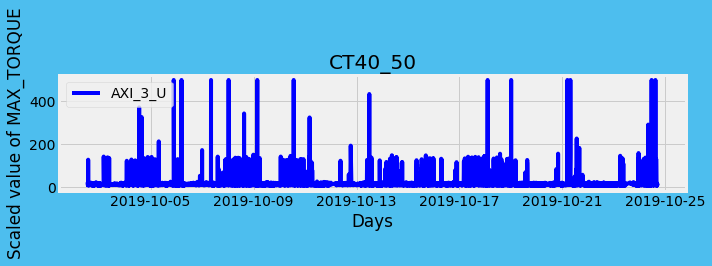

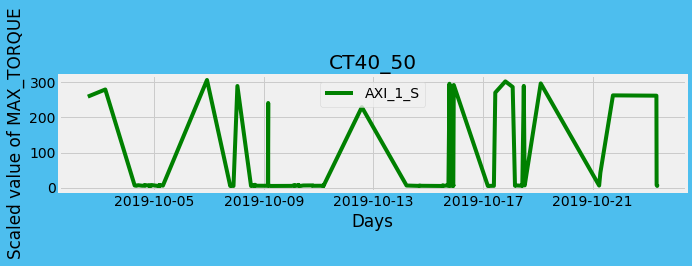

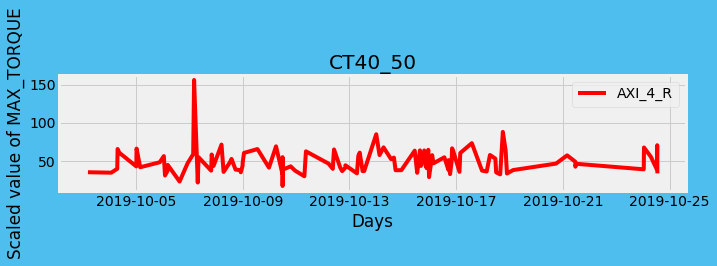

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
16  2019-10-02 13:26:24  AXI_3_U  CT120_130      16.606
56  2019-10-02 13:30:14  AXI_3_U  CT120_130      15.263
148 2019-10-02 13:34:11  AXI_3_U  CT120_130      14.408


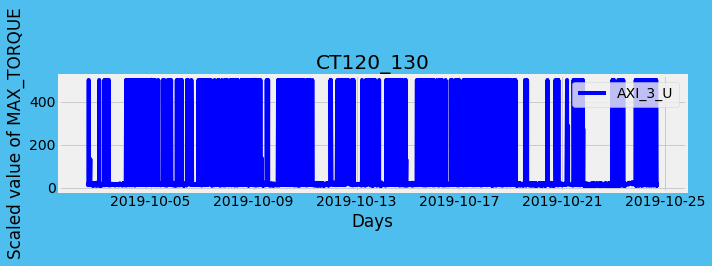

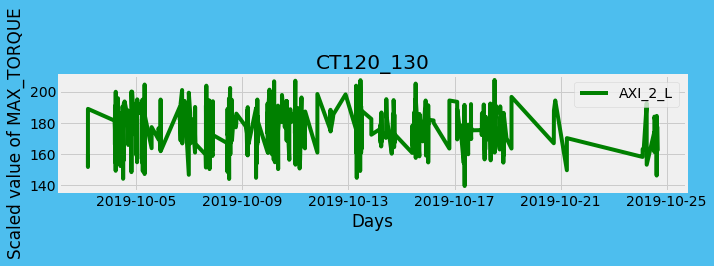

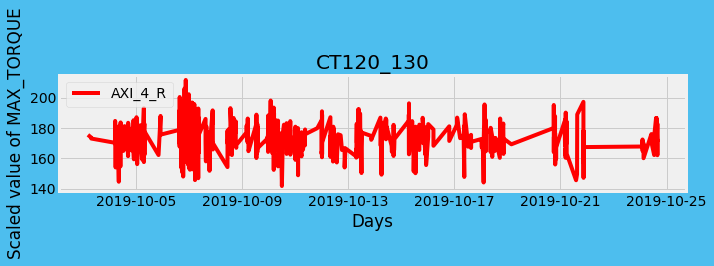

             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
17 2019-10-02 13:26:26  AXI_3_U  CT50_60      13.675
25 2019-10-02 13:26:37  AXI_3_U  CT50_60      74.359
35 2019-10-02 13:26:47  AXI_3_U  CT50_60      10.501


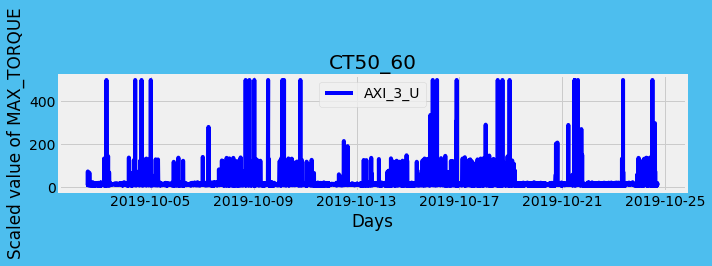

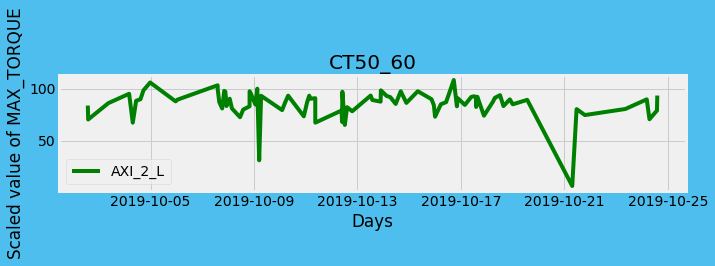

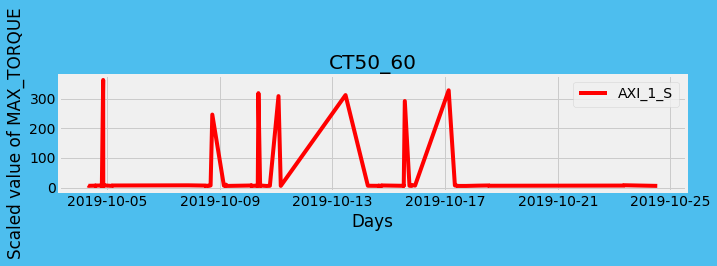

             STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
18 2019-10-02 13:26:26  AXI_1_S  CT100_110     397.924
19 2019-10-02 13:26:27  AXI_4_R  CT100_110     174.969
21 2019-10-02 13:26:29  AXI_4_R  CT100_110     205.861


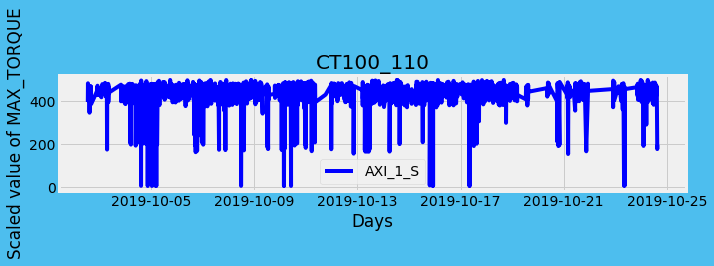

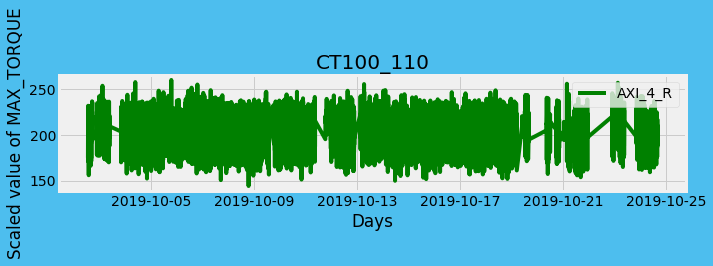

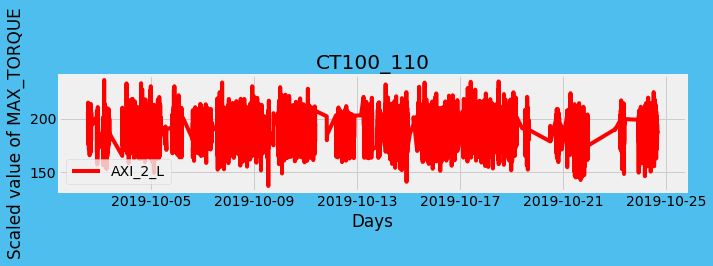

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
20   2019-10-02 13:26:29  AXI_3_U  CT220_230      16.484
851  2019-10-02 14:16:34  AXI_3_U  CT220_230     500.000
1378 2019-10-02 14:49:00  AXI_3_U  CT220_230     500.000


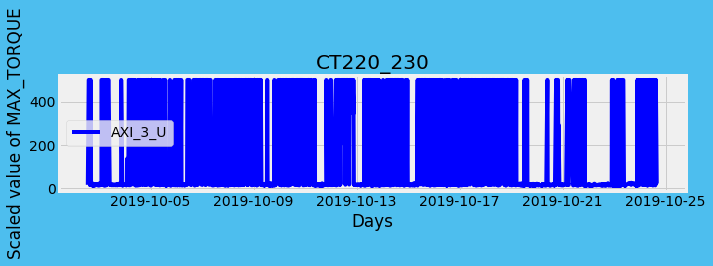

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
23   2019-10-02 13:26:33  AXI_3_U  CT430_440     500.000
2978 2019-10-02 17:22:43  AXI_3_U  CT430_440      17.705
4616 2019-10-02 19:22:23  AXI_3_U  CT430_440      18.803
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
27  2019-10-02 13:26:38  AXI_3_U  CT300_310       500.0
182 2019-10-02 13:34:53  AXI_3_U  CT300_310       500.0
529 2019-10-02 13:57:02  AXI_3_U  CT300_310       500.0


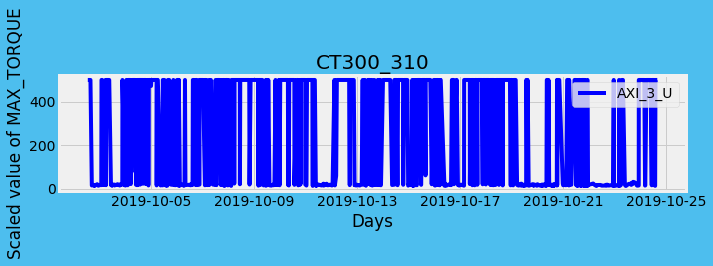

             STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
33 2019-10-02 13:26:44  AXI_3_U  CT140_150      16.117
34 2019-10-02 13:26:46  AXI_3_U  CT140_150      13.309
47 2019-10-02 13:27:02  AXI_3_U  CT140_150     500.000


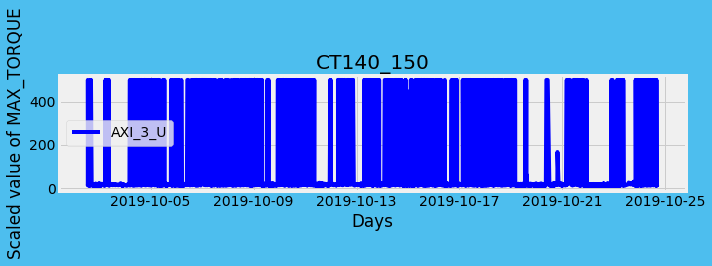

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
49  2019-10-02 13:27:04  AXI_3_U  CT250_260      18.559
171 2019-10-02 13:34:43  AXI_3_U  CT250_260     500.000
483 2019-10-02 13:56:08  AXI_3_U  CT250_260     500.000
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
52   2019-10-02 13:30:08  AXI_3_U  CT480_490       500.0
207  2019-10-02 13:36:27  AXI_3_U  CT480_490       500.0
1982 2019-10-02 15:50:16  AXI_3_U  CT480_490       500.0


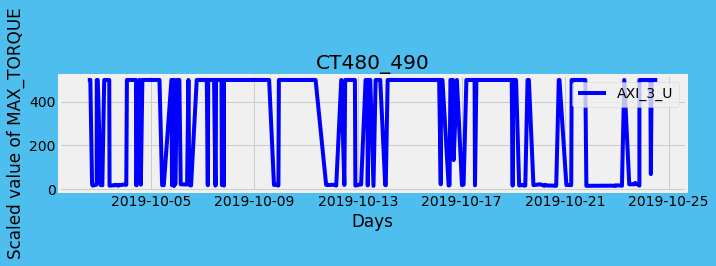

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
59  2019-10-02 13:30:17  AXI_3_U  CT320_330       500.0
113 2019-10-02 13:32:24  AXI_3_U  CT320_330       500.0
146 2019-10-02 13:34:08  AXI_3_U  CT320_330       500.0


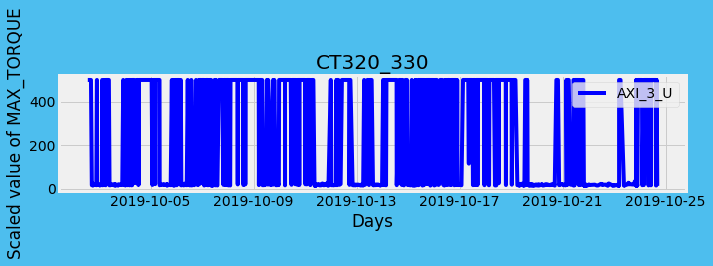

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
63  2019-10-02 13:30:24  AXI_3_U  CT710_720       500.0
464 2019-10-02 13:50:42  AXI_3_U  CT710_720       500.0
467 2019-10-02 13:50:50  AXI_3_U  CT710_720       500.0
             STARTTIME  CHAMBER   RECIPE  MAX_TORQUE
69 2019-10-02 13:30:34  AXI_3_U  CT80_90      10.989
84 2019-10-02 13:30:55  AXI_3_U  CT80_90      16.361
94 2019-10-02 13:31:06  AXI_3_U  CT80_90      15.385


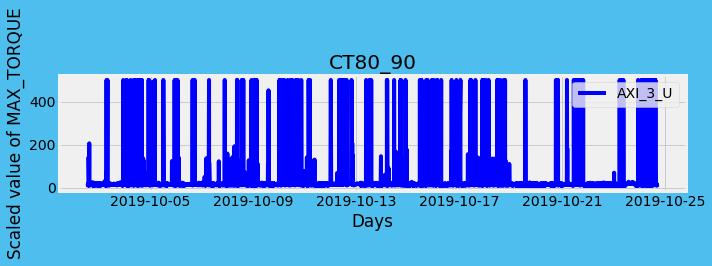

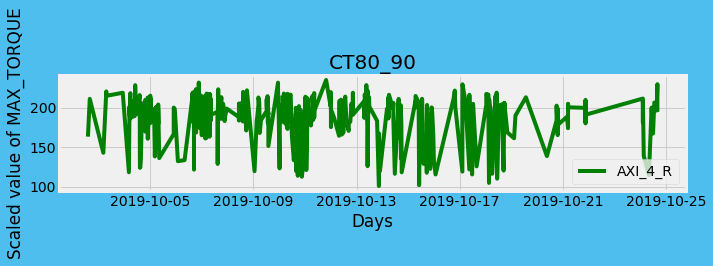

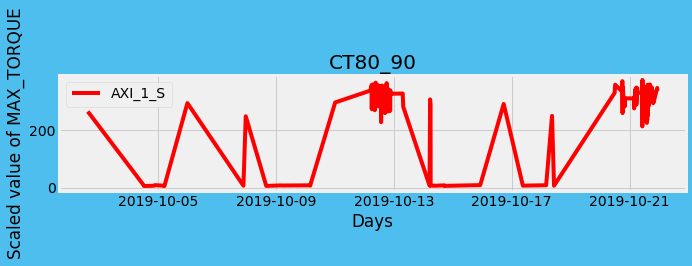

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
73  2019-10-02 13:30:38  AXI_3_U  CT160_170       17.46
130 2019-10-02 13:32:47  AXI_3_U  CT160_170      500.00
302 2019-10-02 13:42:17  AXI_3_U  CT160_170      500.00


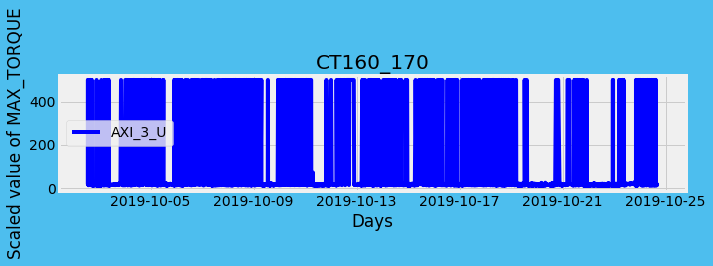

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
74   2019-10-02 13:30:41  AXI_3_U  CT360_370       500.0
239  2019-10-02 13:40:09  AXI_3_U  CT360_370       500.0
1184 2019-10-02 14:36:51  AXI_3_U  CT360_370       500.0


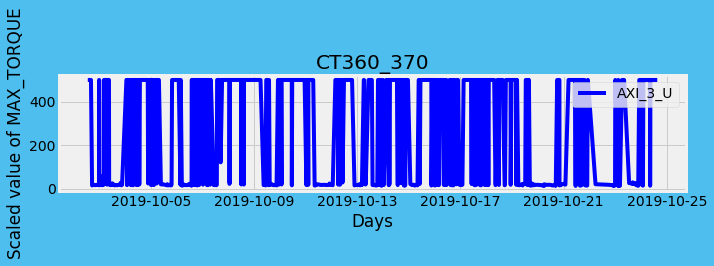

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
77   2019-10-02 13:30:45  AXI_3_U  CT830_840     500.000
345  2019-10-02 13:46:13  AXI_3_U  CT830_840     500.000
9646 2019-10-03 02:42:38  AXI_3_U  CT830_840      18.926
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
91  2019-10-02 13:31:02  AXI_3_U  CT380_390       500.0
657 2019-10-02 14:04:43  AXI_3_U  CT380_390       500.0
912 2019-10-02 14:18:56  AXI_3_U  CT380_390       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
99   2019-10-02 13:32:09  AXI_3_U  CT610_620       500.0
817  2019-10-02 14:12:58  AXI_3_U  CT610_620       500.0
1374 2019-10-02 14:48:54  AXI_3_U  CT610_620       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
117  2019-10-02 13:32:28  AXI_3_U  CT310_320       500.0
200  2019-10-02 13:36:15  AXI_3_U  CT310_320       500.0
2604 2019-10-02 16:26:32  AXI_3_U  CT310_320       500.0


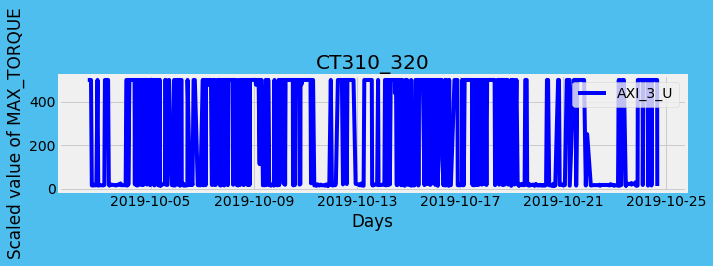

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
119  2019-10-02 13:32:31  AXI_3_U  CT790_800       500.0
1668 2019-10-02 15:08:36  AXI_3_U  CT790_800       500.0
2085 2019-10-02 15:56:22  AXI_3_U  CT790_800       500.0


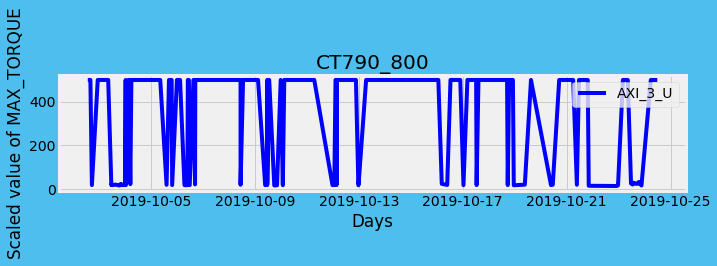

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
125 2019-10-02 13:32:40  AXI_3_U  CT150_160      18.559
198 2019-10-02 13:36:11  AXI_3_U  CT150_160      15.507
260 2019-10-02 13:40:31  AXI_3_U  CT150_160     500.000


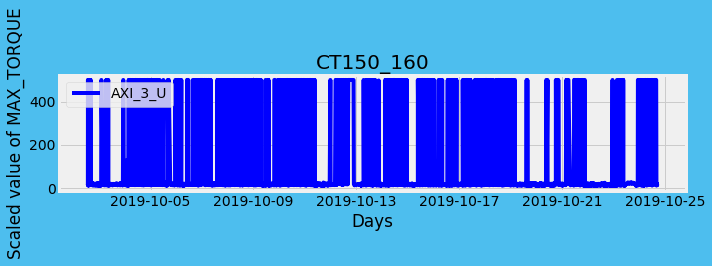

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
138 2019-10-02 13:33:00  AXI_3_U  CT280_290     142.735
226 2019-10-02 13:36:51  AXI_3_U  CT280_290     500.000
656 2019-10-02 14:04:41  AXI_3_U  CT280_290      19.780


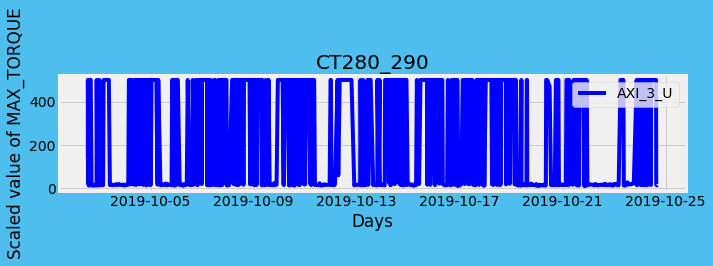

                STARTTIME  CHAMBER       RECIPE  MAX_TORQUE
149   2019-10-02 13:34:13  AXI_3_U  CT1000_1010       500.0
1535  2019-10-02 15:00:29  AXI_3_U  CT1000_1010       500.0
10180 2019-10-03 04:18:19  AXI_3_U  CT1000_1010       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
160  2019-10-02 13:34:30  AXI_3_U  CT370_380     500.000
573  2019-10-02 14:00:53  AXI_3_U  CT370_380     500.000
1086 2019-10-02 14:32:17  AXI_3_U  CT370_380      18.315
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
165  2019-10-02 13:34:36  AXI_3_U  CT390_400       500.0
610  2019-10-02 14:02:38  AXI_3_U  CT390_400       500.0
1218 2019-10-02 14:40:32  AXI_3_U  CT390_400       500.0
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
169 2019-10-02 13:34:40  AXI_3_U  CT210_220     500.000
366 2019-10-02 13:46:40  AXI_3_U  CT210_220     500.000
385 2019-10-02 13:48:08  AXI_3_U  CT210_220      15.507


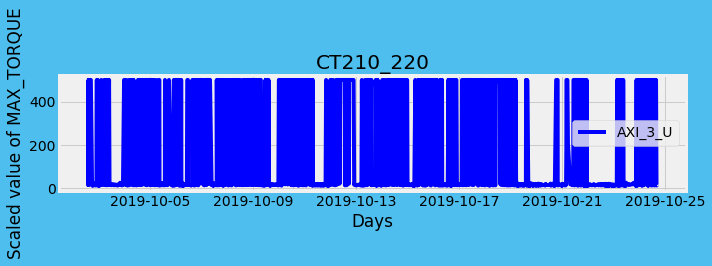

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
187  2019-10-02 13:35:00  AXI_3_U  CT470_480      500.00
2631 2019-10-02 16:30:08  AXI_3_U  CT470_480      500.00
2984 2019-10-02 17:22:52  AXI_3_U  CT470_480       19.78


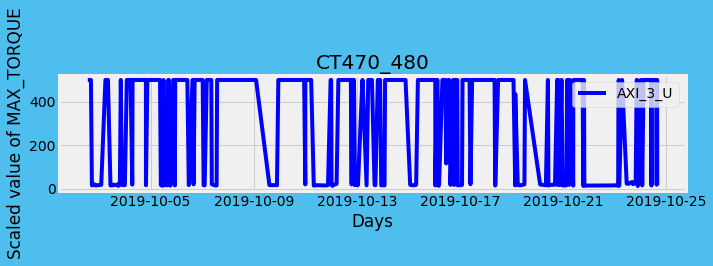

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
214 2019-10-02 13:36:37  AXI_3_U  CT340_350       500.0
591 2019-10-02 14:02:15  AXI_3_U  CT340_350       500.0
839 2019-10-02 14:16:20  AXI_3_U  CT340_350       500.0


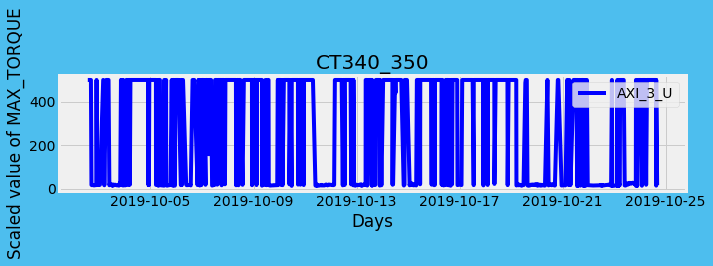

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
220  2019-10-02 13:36:44  AXI_3_U  CT660_670     500.000
3788 2019-10-02 18:20:11  AXI_3_U  CT660_670      20.269
6257 2019-10-02 21:58:59  AXI_3_U  CT660_670     500.000
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
229  2019-10-02 13:36:57  AXI_3_U  CT240_250      15.995
523  2019-10-02 13:56:53  AXI_3_U  CT240_250     500.000
1407 2019-10-02 14:52:33  AXI_3_U  CT240_250      13.919
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
230  2019-10-02 13:36:59  AXI_3_U  CT540_550       500.0
1194 2019-10-02 14:40:08  AXI_3_U  CT540_550       500.0
2200 2019-10-02 16:02:48  AXI_3_U  CT540_550       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
248  2019-10-02 13:40:20  AXI_3_U  CT400_410       500.0
309  2019-10-02 13:42:27  AXI_3_U  CT400_410       500.0
1697 2019-10-02 15:12:10  AXI_3_U  CT400_410       500.0


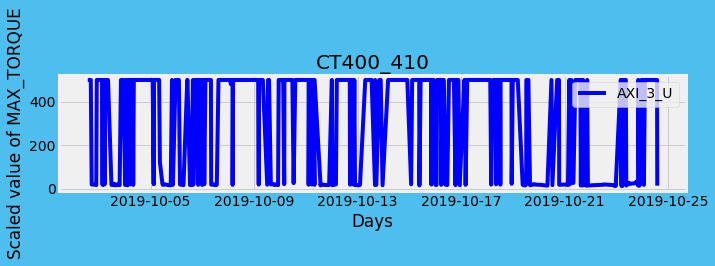

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
262 2019-10-02 13:40:33  AXI_3_U  CT190_200       500.0
272 2019-10-02 13:40:44  AXI_3_U  CT190_200       500.0
340 2019-10-02 13:46:08  AXI_3_U  CT190_200       500.0


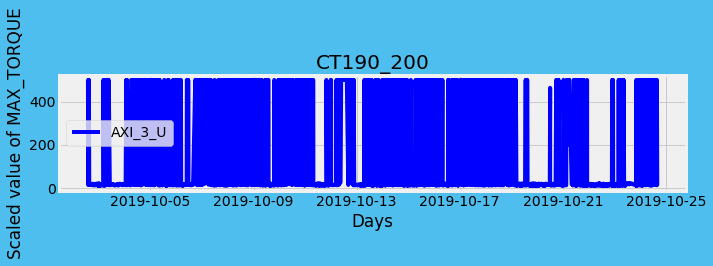

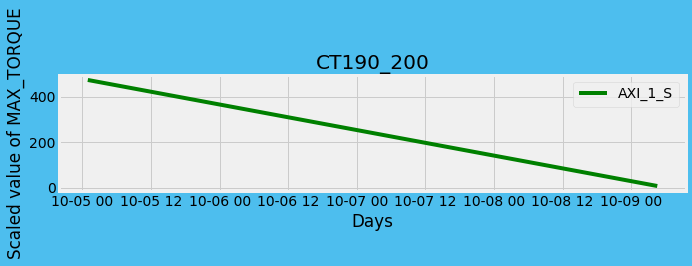

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
267 2019-10-02 13:40:38  AXI_3_U  CT580_590       500.0
320 2019-10-02 13:42:43  AXI_3_U  CT580_590       500.0
449 2019-10-02 13:50:25  AXI_3_U  CT580_590       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
318  2019-10-02 13:42:39  AXI_3_U  CT330_340       500.0
928  2019-10-02 14:20:11  AXI_3_U  CT330_340       500.0
1548 2019-10-02 15:00:46  AXI_3_U  CT330_340       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
362  2019-10-02 13:46:34  AXI_3_U  CT640_650       500.0
560  2019-10-02 14:00:36  AXI_3_U  CT640_650       500.0
1842 2019-10-02 15:32:20  AXI_3_U  CT640_650       500.0


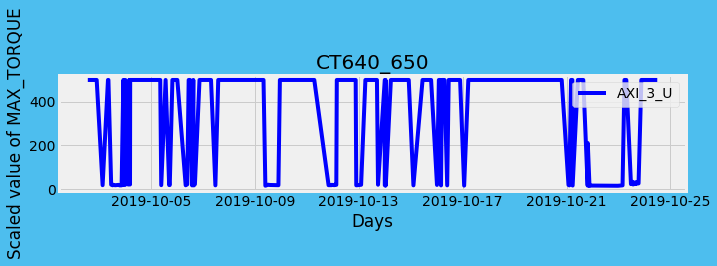

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
374  2019-10-02 13:46:51  AXI_3_U  CT260_270     500.000
794  2019-10-02 14:12:29  AXI_3_U  CT260_270     500.000
1081 2019-10-02 14:32:09  AXI_3_U  CT260_270      19.902


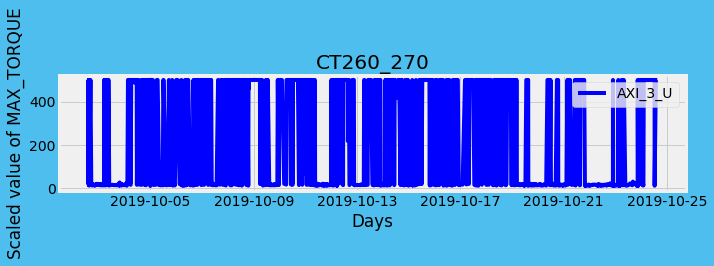

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
402 2019-10-02 13:48:26  AXI_3_U  CT200_210       500.0
454 2019-10-02 13:50:31  AXI_3_U  CT200_210       500.0
457 2019-10-02 13:50:33  AXI_3_U  CT200_210       500.0


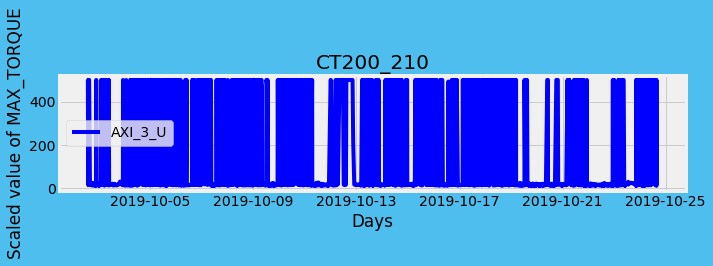

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
409  2019-10-02 13:48:36  AXI_3_U  CT290_300     500.000
1512 2019-10-02 14:58:47  AXI_3_U  CT290_300      18.559
1516 2019-10-02 14:58:53  AXI_3_U  CT290_300      15.385
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
433  2019-10-02 13:50:08  AXI_3_U  CT550_560       500.0
1449 2019-10-02 14:54:30  AXI_3_U  CT550_560       500.0
2385 2019-10-02 16:14:39  AXI_3_U  CT550_560       500.0
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
444 2019-10-02 13:50:20  AXI_3_U  CT270_280     500.000
858 2019-10-02 14:16:43  AXI_3_U  CT270_280     500.000
872 2019-10-02 14:17:02  AXI_3_U  CT270_280      12.454


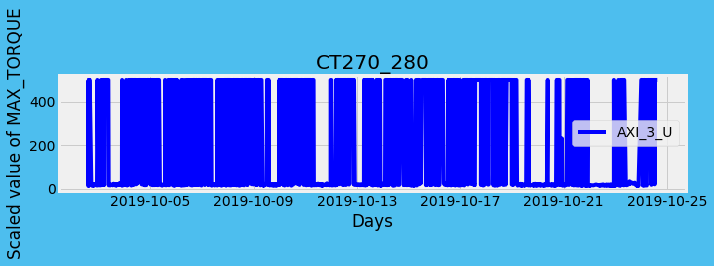

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
492  2019-10-02 13:56:18  AXI_3_U  CT350_360       500.0
641  2019-10-02 14:04:22  AXI_3_U  CT350_360       500.0
1427 2019-10-02 14:53:03  AXI_3_U  CT350_360       500.0
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
498 2019-10-02 13:56:25  AXI_3_U  CT440_450       500.0
518 2019-10-02 13:56:47  AXI_3_U  CT440_450       500.0
617 2019-10-02 14:02:49  AXI_3_U  CT440_450       500.0


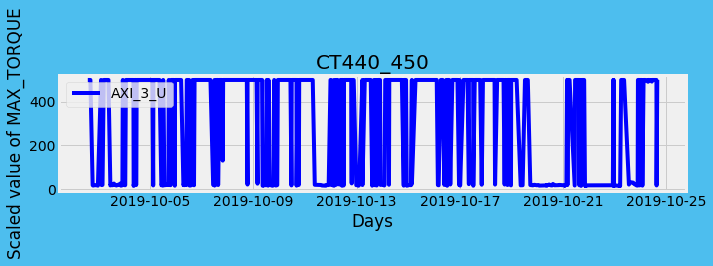

              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
525 2019-10-02 13:56:55  AXI_3_U  CT180_190      16.606
649 2019-10-02 14:04:35  AXI_3_U  CT180_190     500.000
675 2019-10-02 14:06:08  AXI_3_U  CT180_190     500.000


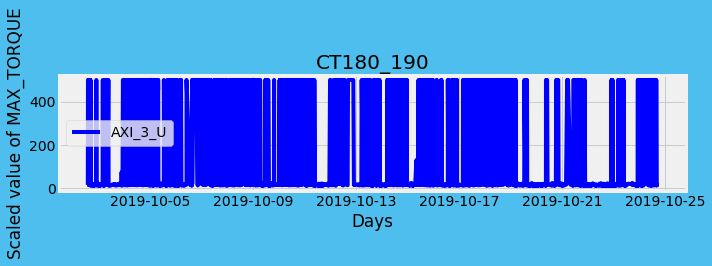

                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
542   2019-10-02 14:00:14  AXI_3_U  CT920_930     500.000
2004  2019-10-02 15:50:46  AXI_3_U  CT920_930     500.000
15456 2019-10-03 12:22:49  AXI_3_U  CT920_930      18.681
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
576  2019-10-02 14:00:58  AXI_3_U  CT840_850     500.000
9627 2019-10-03 02:36:39  AXI_3_U  CT840_850      18.926
9749 2019-10-03 03:18:36  AXI_3_U  CT840_850      19.414
              STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
589 2019-10-02 14:02:12  AXI_3_U  CT170_180      13.919
692 2019-10-02 14:06:26  AXI_3_U  CT170_180      15.507
995 2019-10-02 14:26:25  AXI_3_U  CT170_180      20.513


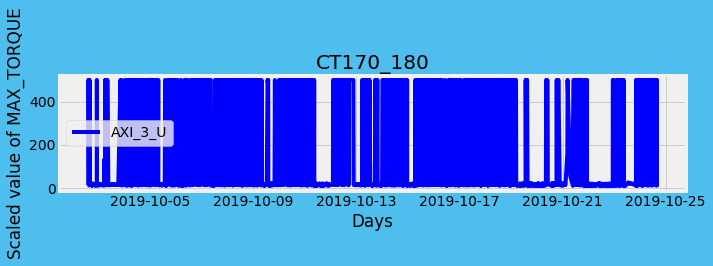

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
595  2019-10-02 14:02:23  AXI_3_U  CT500_510       500.0
967  2019-10-02 14:20:55  AXI_3_U  CT500_510       500.0
2446 2019-10-02 16:17:02  AXI_3_U  CT500_510       500.0


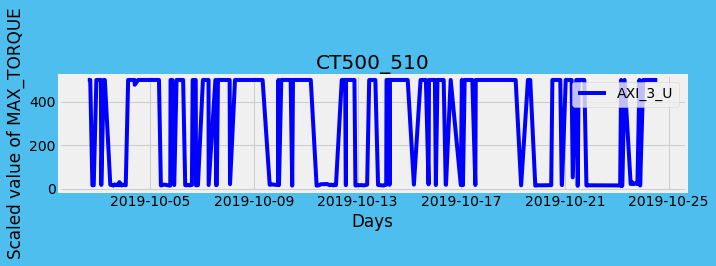

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
644  2019-10-02 14:04:27  AXI_3_U  CT850_860     500.000
2065 2019-10-02 15:54:58  AXI_3_U  CT850_860     500.000
9763 2019-10-03 03:20:41  AXI_3_U  CT850_860      18.559


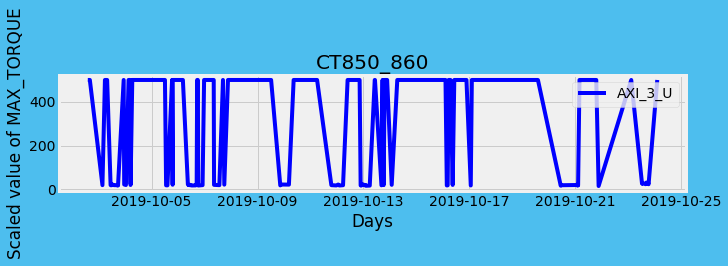

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
715  2019-10-02 14:06:56  AXI_3_U  CT760_770      500.00
6287 2019-10-02 22:00:46  AXI_3_U  CT760_770      500.00
9524 2019-10-03 02:10:09  AXI_3_U  CT760_770       19.78
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
721  2019-10-02 14:07:04  AXI_3_U  CT230_240     447.985
911  2019-10-02 14:18:54  AXI_3_U  CT230_240     500.000
1016 2019-10-02 14:26:51  AXI_3_U  CT230_240      18.315


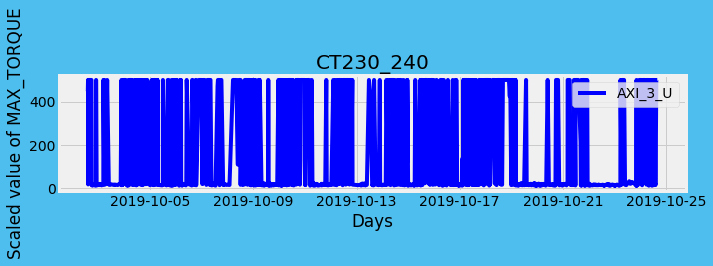

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
743  2019-10-02 14:10:29  AXI_3_U  CT730_740     500.000
5935 2019-10-02 21:38:40  AXI_3_U  CT730_740     500.000
9583 2019-10-03 02:20:43  AXI_3_U  CT730_740      17.216
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
829  2019-10-02 14:16:08  AXI_3_U  CT520_530     500.000
3791 2019-10-02 18:20:19  AXI_3_U  CT520_530      18.315
9878 2019-10-03 03:48:21  AXI_3_U  CT520_530      17.094
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
864  2019-10-02 14:16:50  AXI_3_U  CT770_780     500.000
2288 2019-10-02 16:08:42  AXI_3_U  CT770_780     500.000
5938 2019-10-02 21:38:58  AXI_3_U  CT770_780      22.589
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
956   2019-10-02 14:20:40  AXI_3_U  CT900_910     500.000
12693 2019-10-03 07:24:18  AXI_3_U  CT900_910     500.000
15432 2019-10-03 12:16:38  AXI_3_U  CT900_910      18.681
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
971  2019-10-02 14:21:01  A

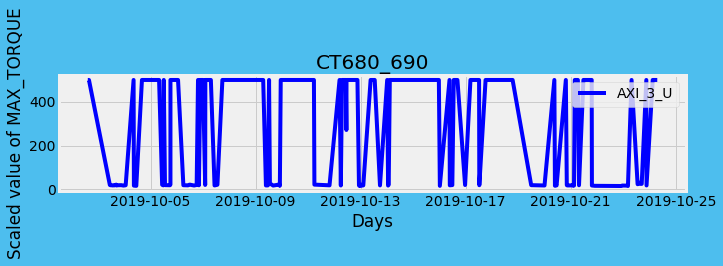

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1230 2019-10-02 14:40:48  AXI_3_U  CT590_600       500.0
1258 2019-10-02 14:44:19  AXI_3_U  CT590_600       500.0
1356 2019-10-02 14:48:32  AXI_3_U  CT590_600       500.0


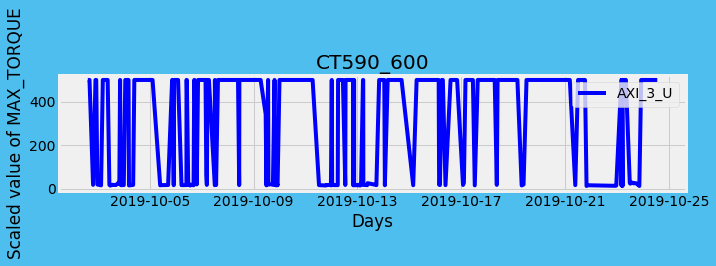

                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1321  2019-10-02 14:46:44  AXI_3_U  CT960_970       500.0
10426 2019-10-03 04:42:23  AXI_3_U  CT960_970       500.0
10759 2019-10-03 05:00:34  AXI_3_U  CT960_970       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1341 2019-10-02 14:48:09  AXI_3_U  CT450_460       500.0
1710 2019-10-02 15:12:28  AXI_3_U  CT450_460       500.0
2641 2019-10-02 16:30:20  AXI_3_U  CT450_460       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1346 2019-10-02 14:48:14  AXI_3_U  CT620_630     500.000
6590 2019-10-02 22:26:09  AXI_3_U  CT620_630      19.414
7985 2019-10-03 00:04:55  AXI_3_U  CT620_630      18.559
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1396 2019-10-02 14:52:19  AXI_3_U  CT780_790     500.000
2145 2019-10-02 16:00:36  AXI_3_U  CT780_790     500.000
9594 2019-10-03 02:24:30  AXI_3_U  CT780_790      17.216


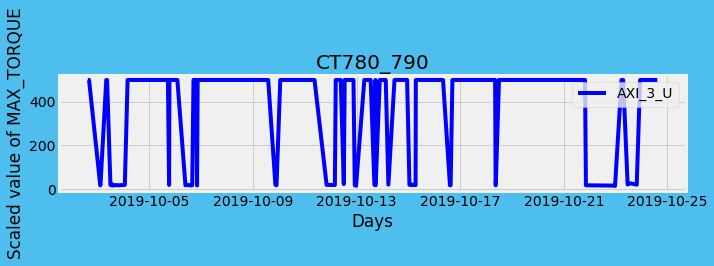

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1461 2019-10-02 14:54:44  AXI_3_U  CT510_520       500.0
1749 2019-10-02 15:24:17  AXI_3_U  CT510_520       500.0
2411 2019-10-02 16:16:16  AXI_3_U  CT510_520       500.0
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1465  2019-10-02 14:54:50  AXI_3_U  CT970_980     500.000
8115  2019-10-03 00:14:09  AXI_3_U  CT970_980      20.269
10592 2019-10-03 04:52:29  AXI_3_U  CT970_980     500.000
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1577 2019-10-02 15:02:30  AXI_3_U  CT420_430       500.0
1714 2019-10-02 15:12:33  AXI_3_U  CT420_430       500.0
2498 2019-10-02 16:22:15  AXI_3_U  CT420_430       500.0


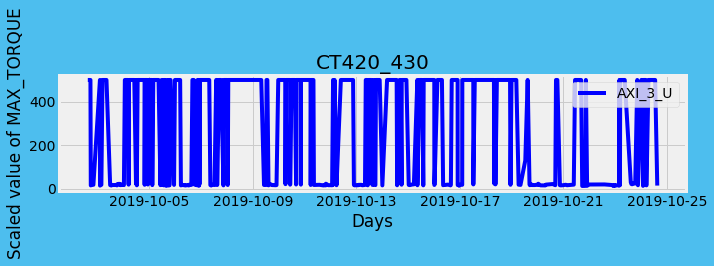

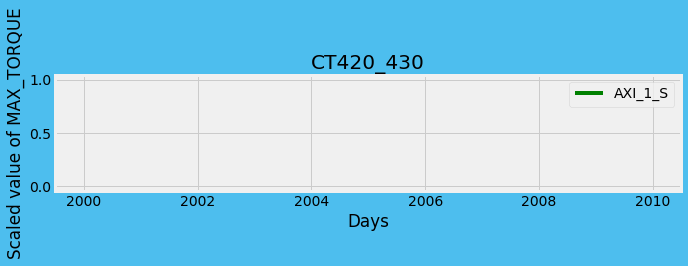

               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1614 2019-10-02 15:04:21  AXI_3_U  CT880_890       500.0
2434 2019-10-02 16:16:46  AXI_3_U  CT880_890       500.0
2484 2019-10-02 16:20:57  AXI_3_U  CT880_890       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1647 2019-10-02 15:08:08  AXI_3_U  CT410_420      500.00
2389 2019-10-02 16:14:44  AXI_3_U  CT410_420      500.00
2913 2019-10-02 17:14:58  AXI_3_U  CT410_420       19.17
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1764  2019-10-02 15:24:44  AXI_3_U  CT860_870     500.000
15264 2019-10-03 11:20:39  AXI_3_U  CT860_870      19.902
15595 2019-10-03 12:54:51  AXI_3_U  CT860_870      18.193
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1832 2019-10-02 15:32:08  AXI_3_U  CT490_500       500.0
2362 2019-10-02 16:14:11  AXI_3_U  CT490_500       500.0
2512 2019-10-02 16:22:37  AXI_3_U  CT490_500       500.0


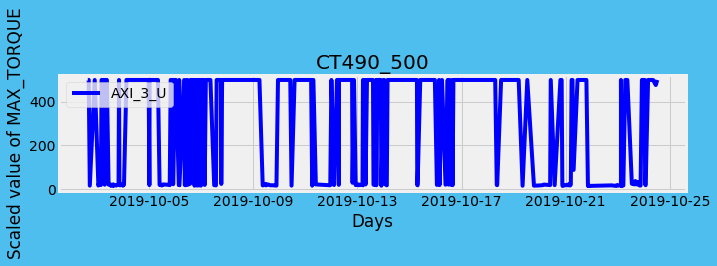

                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1846  2019-10-02 15:32:28  AXI_3_U  CT870_880       500.0
9555  2019-10-03 02:14:38  AXI_3_U  CT870_880       500.0
11634 2019-10-03 06:02:19  AXI_3_U  CT870_880       500.0
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1901  2019-10-02 15:36:35  AXI_3_U  CT700_710     500.000
9492  2019-10-03 02:04:43  AXI_3_U  CT700_710      17.094
14368 2019-10-03 09:16:31  AXI_3_U  CT700_710     500.000
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
1952 2019-10-02 15:48:40  AXI_3_U  CT570_580       500.0
1987 2019-10-02 15:50:23  AXI_3_U  CT570_580       500.0
2268 2019-10-02 16:08:19  AXI_3_U  CT570_580       500.0
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
2111 2019-10-02 15:56:58  AXI_3_U  CT530_540      500.00
7932 2019-10-02 23:54:12  AXI_3_U  CT530_540       19.17
9679 2019-10-03 02:50:17  AXI_3_U  CT530_540      500.00
               STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
2125 2019-10-02 16:00:1

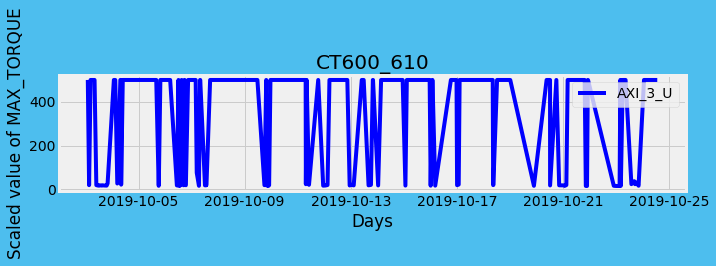

                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
9610  2019-10-03 02:30:22  AXI_3_U  CT930_940      17.705
15112 2019-10-03 10:36:46  AXI_3_U  CT930_940      18.803
15285 2019-10-03 11:38:42  AXI_3_U  CT930_940      18.315
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
9682  2019-10-03 02:50:24  AXI_3_U  CT890_900       500.0
11243 2019-10-03 05:26:28  AXI_3_U  CT890_900       500.0
12186 2019-10-03 06:44:30  AXI_3_U  CT890_900       500.0
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
9770  2019-10-03 03:22:49  AXI_3_U  CT750_760      17.827
14285 2019-10-03 09:10:38  AXI_3_U  CT750_760     500.000
15302 2019-10-03 11:42:17  AXI_3_U  CT750_760      17.460
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
11184 2019-10-03 05:22:56  AXI_3_U  CT980_990     500.000
13972 2019-10-03 08:48:57  AXI_3_U  CT980_990     500.000
15315 2019-10-03 11:44:34  AXI_3_U  CT980_990      18.926
                STARTTIME  CHAMBER     RECIPE  MAX_TORQUE
11514 2019-10-

In [210]:
drawData()

In [102]:
# 只用MAX_TORQUE進行預測
y1 = train_90['MAX_TORQUE'].values

NameError: name 'train_90' is not defined

In [ ]:
# 畫圖
plt.figure(figsize=(15,7), facecolor='#0B778B', edgecolor='green')
plt.title('Scaled MAX_TORQUE from datetime')
plt.xlabel('Days')
plt.ylabel('Scaled value of MAX_TORQUE')
plt.plot(train_time[1000:1050].values ,y1[1000:1050], label='MAX_TORQUE data')
plt.legend()
plt.show()

In [ ]:
freq1 = 500
freq2 = 600
freq3 = 3000
y=7*np.sin(2*np.pi*freq1*y1)  + 2.8 * np.sin(2*np.pi*freq2*y1) + 5.1*np.sin(2*np.pi*freq3*y1)

In [ ]:
yy=fft(y)  

In [ ]:
yreal = yy.real    # 獲取實數部分
yimag = yy.imag    # 獲取虛數部分
 
yf=abs(fft(y))    # 取絕對值
yf1=abs(fft(y))/len(y1)   #歸一化處理
yf2 = yf1[range(int(len(y1)/2))] #由於對稱性，只取一半區間
 
xf = np.arange(len(y))  # 頻率
xf1 = xf
xf2 = xf[range(int(len(y1)/2))] #取一半區間

In [ ]:
plt.figure(figsize=(50,7))
plt.subplot(222)
plt.plot(train_time[10000:12000].values,yf1[10000:12000],'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')